In [1]:
%reset -f
import gym
import torch
import tqdm
import math
import pickle
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from chameleon import Chameleon
from stable_baselines3.common.callbacks import (
    EvalCallback,
    BaseCallback,
    StopTrainingOnRewardThreshold,
)

In [3]:
def load_plot_results(monitor_file: str, monitor_dir: str) -> None:
    rews = np.loadtxt(monitor_file, delimiter=",", usecols=0, skiprows=2)
    num_eps = rews.shape[0]
    keep_after = 100 * math.floor(
        int(num_eps / 100)
    )  # just want number of episodes kept to be divisible by 100
    rews = rews[:keep_after:]
    rews = rews.reshape((-1, 100))
    means = rews.mean(axis=1)
    # Plot and save results
    plt.plot(means)
    plt.title("Episode reward over time")
    plt.xlabel("Epoch (100 episodes)")
    plt.ylabel("Mean reward")
    plt.plot()
    # plt.savefig(monitor_dir + f"/rew_plot{i}.png")
    # plt.clf()

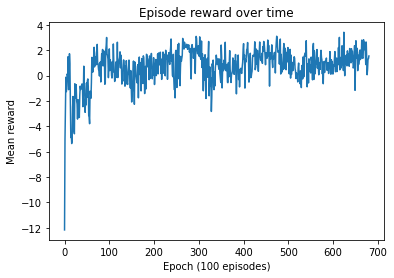

In [5]:
load_plot_results("monitors_a0.1_target1.81/run0.monitor.csv", "")

In [ ]:
env = Chameleon(atol=0.1, E=50, target_pos=1.79, train=False)
# model = PPO(
#     policy="MlpPolicy",
#     env=env,
#     verbose=0,
# )
# model.learn(total_timesteps=2048)
# model = PPO.load("agents_a0.1_target1.82/run0/best_model.zip")

In [ ]:
# state = env.reset()
# done = False
# while not done:
#     action = model.predict(state, deterministic=True)[0]
#     state, rew, done, info = env.step(action)
#     if done:
#         state = env.winning_pos[-1]
#     print(f"Tip position is {env.pos[-1]}")
#     print(f"Target position is {env.target_pos}")
#     print(f"Reward is {rew}")
#     print(f"Action is {action}")
#     print(f"State is {state}")
#     print('\n\n')

In [ ]:
env = Chameleon(atol=0.1, E=50, target_pos=1.79, train=False)

In [ ]:
env.U0

In [ ]:
env.step([0.1, 0.1])

In [ ]:
env.pos

In [ ]:
env.u_current

In [ ]:
env.U0

In [ ]:
env.returning

In [ ]:
env.time

In [ ]:
env.u_tiny

In [ ]:
env.u_velocity_history

In [ ]:
env.winning_pos

In [ ]:
model.policy

In [ ]:
mlp_extractor = model.policy.mlp_extractor

In [ ]:
feature_extractor = model.policy.features_extractor

In [ ]:
feature_extractor

In [ ]:
mlp_extractor

In [ ]:
pytorch_total_params = sum(p.numel() for p in mlp_extractor.parameters())
pytorch_trainable_total_params = sum(
    p.numel() for p in mlp_extractor.parameters() if p.requires_grad
)

In [ ]:
pytorch_trainable_total_params + 2 * 65

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.policy.parameters())
pytorch_trainable_total_params = sum(
    p.numel() for p in model.policy.parameters() if p.requires_grad
)

In [ ]:
type(model)

In [ ]:
pytorch_trainable_total_params

# This is all of the disctinct networks and I can get the total number of parameters in the networks by adding up the number of parameters in each subcomponent. 

So looking at the number of parameters in the model.policy should match the sum of the things below. Maybe I will be off by the number of standard deviation parameters which is one in my case. 

In [ ]:
mlp_extractor = model.policy.mlp_extractor

In [ ]:
mlp_extractor

In [ ]:
# for p in mlp_extractor.policy_net.parameters():
#     print(p)
#     print(p.shape)

In [ ]:
model.policy.action_net

In [ ]:
model.policy.value_net

In [ ]:
model.learning_rate

In [ ]:
model